Parisima Abdali, parisima.abdali@nyu.edu <br>

## Problem 2:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<class 'numpy.ndarray'>
(248, 280)


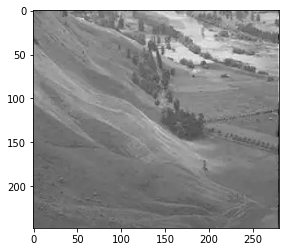

In [11]:
# Reading image (low-contrast image)
img = cv2.imread('/content/drive/MyDrive/Coding Assignments IVP/lowcontrast.webp', 0)    
# img is a 3-dimensional numpy array (third number indicates channel)
print(type(img)) 
print(img.shape) 
plt.imshow(img, cmap ='gray') 
# we need to convert this img to grayscale (one channel)

In [21]:
# Calculate histogram and normalize
# cv.calcHist([img], channels, mask, bins, ranges)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

(0.0, 256.0)

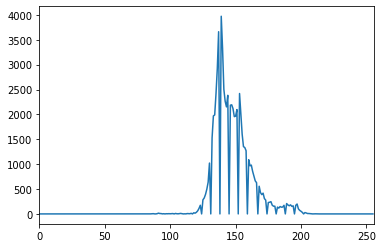

In [22]:
plt.plot(hist)
plt.xlim([0, 256])

Contrast refers to the difference between dark and light pixels intensity. For low-contrast image there should be small difference between darkest and lightest pixels in histogram. <br>
In general, an image with good contrast has a histogram that spans the full range of intensities and is distributed evenly across the full range. An image with poor contrast will have a histogram that is either heavily skewed towards the dark or light end of the intensity range, or is concentrated in a narrow range of intensities, indicating a lack of contrast. 

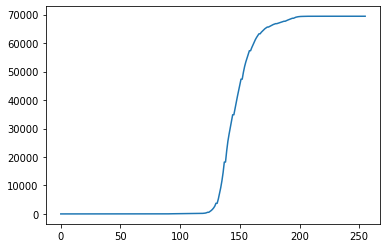

In [14]:
# Calculating CDF 
cdf = hist.cumsum()
plt.plot(cdf)

This plot is a correct representation for CDF plot according to lecture. 

In [15]:
# Normalizing CDF values to 0-255
cdf_normalized = cdf * 255/ cdf[-1]

In [16]:
# Replace the vales with normalized cdf values 
img_histeq = cdf_normalized[img]

Text(0.5, 1.0, 'Equalized Image')

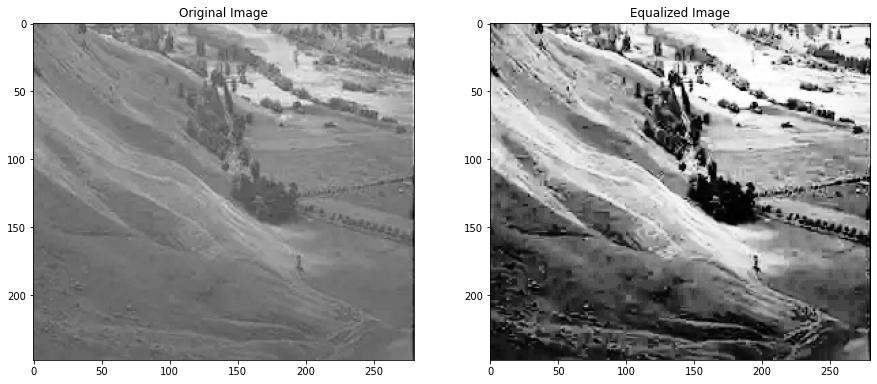

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img, cmap = plt.cm.gray)    
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(img_histeq, cmap = plt.cm.gray)
plt.title('Equalized Image')

(array([2.270e+02, 1.720e+02, 1.740e+02, 2.830e+02, 3.210e+02, 3.940e+02,
        0.000e+00, 4.990e+02, 0.000e+00, 6.390e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 1.022e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.527e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.970e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.989e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.417e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.923e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.662e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

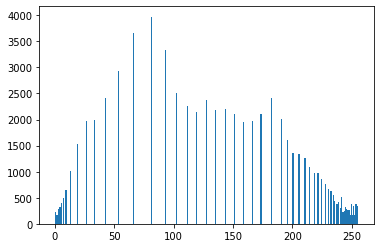

In [18]:
plt.hist(img_histeq.ravel(), 256, [0, 256])

As we expected, histogram equalization results in an increased dynamic range (the intensities are spread out over a wider range of values). This can help to bring out subtle details in the image that were previously difficult to see due to the narrow range of intensities. <br>
However, this method might not always result in better quality of the image. 